# *Relatório - Projeto 2*

## *Algoritmos Genéticos*

### *Grupo:*
- João Paulo Soubihe RA 151106
- Matheus Silva Capeletti RA 203587
- Lucas
- Karol
- Johana

### *Contribuições:*
- João
- Matheus: inicializador de população aleatória, seleção por torneio, solver, função de fitness, coleta de dados
- Lucas
- Karol
- Johana


### *Introdução*

### *Modelo*

### *Aptitude*



Com base no contexto escolhido precisamos escolher uma função que de certa forma avalie a cobertura que essa distribuição de hospitais poderiam trazer para a população.

Definimos que cada hospital teria em sua estrutura de dados um _range_. Tal atributo nos daria de certa forma a dimensão da unidade e o alcance que conseguiríamos abranger.

Supondo, por exemplo, que um hospital de range 2 está localizado em um espaço (x,y) do nosso grid. Esse centro poderá atender pessoas localizadas nos espaços

- (x,y)
- (x + 1, y)
- (x + 2, y)
- (x - 1, y)
- (x - 2, y)
- (x, y + 1)
- (x, y + 2)
- (x, y - 1)
- (x, y - 2)

<div style="text-align: center"><img src="range.png" width="350" /></div>


Outra decisão importante que tivemos que pensar é a qual penaliza uma certa solução. 

Como estamos trabalhando com indivíduos de tamanho variável, precisamos de algum mecanismo que garanta a veracidade de nossa simulação e de certa forma limite essa expansão. Aliás, se passarmos para o mundo real, cada hospital tem um custo para os governantes não é mesmo?

Pensando em uma simulação mais próxima da realidade e também pensando na diversidade entre os hospitais, impomos uma outra restrição a um range muito grande. Um hospital naturalmente não conseguirá atender um raio muito acima do que o normal. Assim procuramos de certa maneira normalizar esse range através da razão pelo máximo alcance de um indivíduo dessa população.
 
Quantizamos esse aspecto na forma de um ponto a menos em nossa avaliação para cada hospital compondo a solução.

Assim, com os parâmetros descritos, podemos quantizar a capacidade de atendimento de cada população. Através da equação:

```
    fitness = (area - custo) / maior_alcance
```

Onde:

 - _area_ é dada pela quantidade de espaços sendo englobados no alcance de todos os hospitais em conjunto, *sem contabillizar duplicatas*;
 - _custo_ é dado pela soma das penalidades de cada solução, ou seja, o tamanho delas, ou o número de hospitais sendo considerados.

```python
@memoize_fitness
def fitness_function1(individual):
    #Cada hospital gera uma penalidade de 1 ponto
    #O maior alcance dos hospitais também gera uma penalidade
    #O valor da aptidão será (area - custo) / max(range)
    reached = []
    custo = len(individual)
    maxRange = 1
    for hospital in individual:
        reached.extend(hospital.get_reach())
        if hospital.range > maxRange:
            maxRange = hospital.range

    area = len(set(reached))
    fitness = float(area - custo) / maxRange
    return fitness
```



### *Dados*

O algoritmo se comportou de maneiras bem distintas alterando-se entre seleção por roleta ou torneio, outros fatores relevantes (que não sejam tamanho da população, número de iterações ou critério de convergência) na qualidade da solução são as taxas de mutação e crossover, mutações geram soluções melhores com mais frequência do que crossover.

Um ponto interessante é que a seleção por roleta requer um critério de convergência alto, pois suas soluções oscilam bastante, um critério pequeno nas primeiras execuções resultou no algoritmo parando a execução antes do limite de iterações, porém seu tempo de execução para um tamanho de população e limite de iterações é melhor que a seleção por torneio.
Seguem imagens de alguns cenários de execução (todos para uma cidade de dimensões 100x100 e inicialização semelhante):

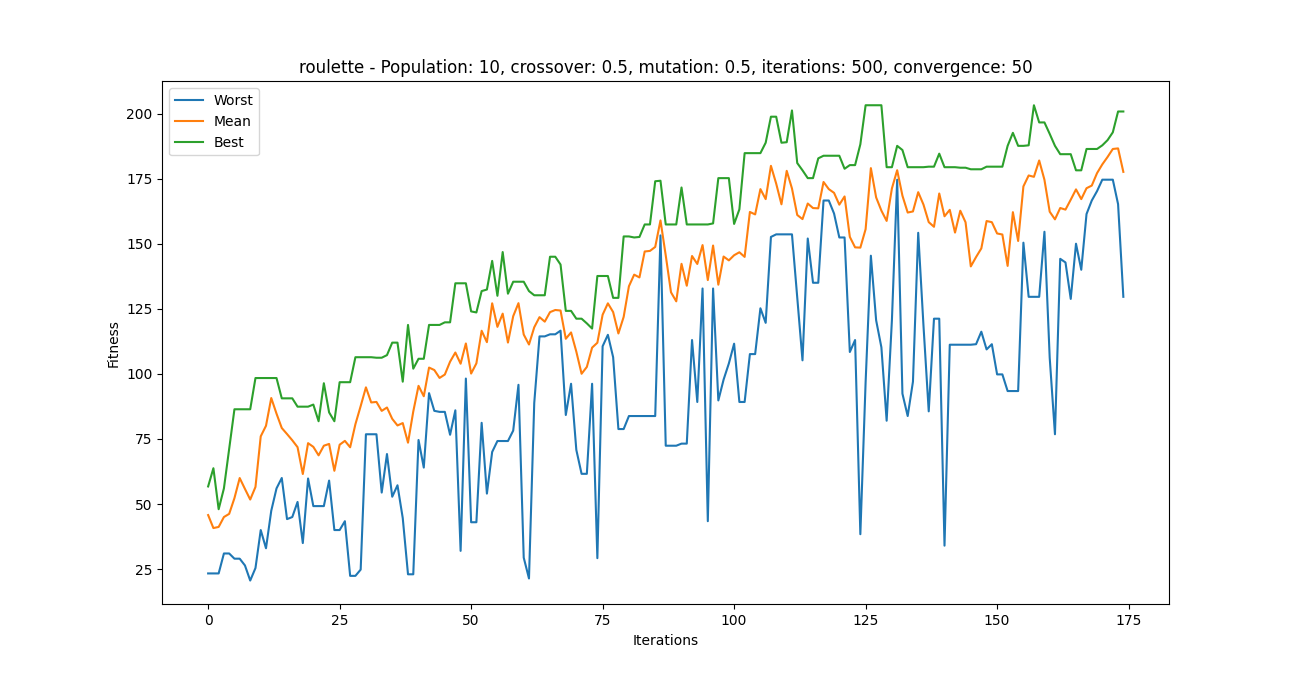

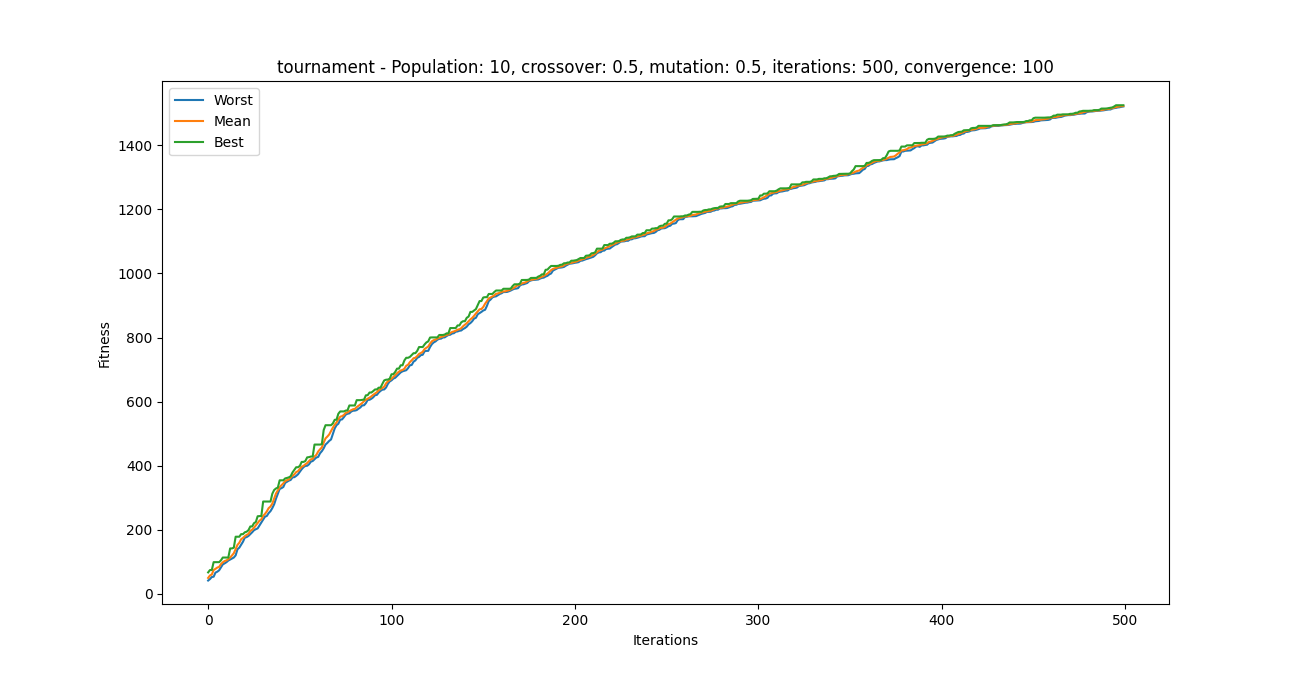

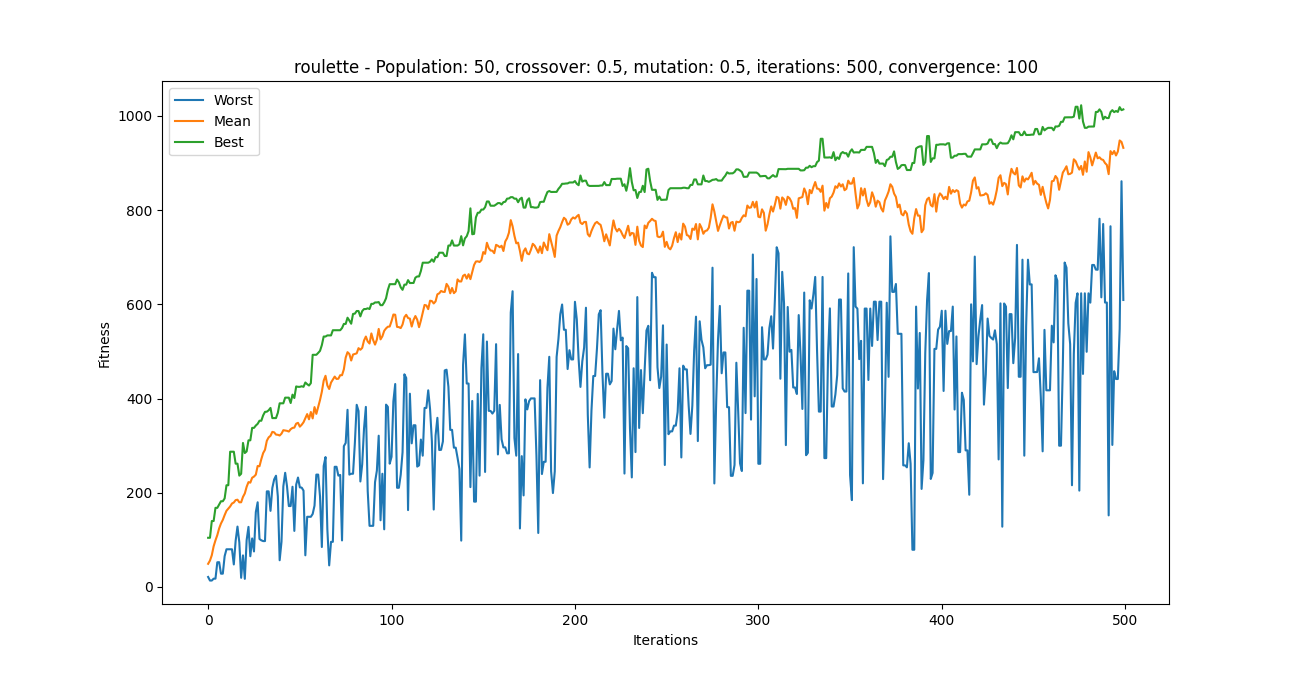

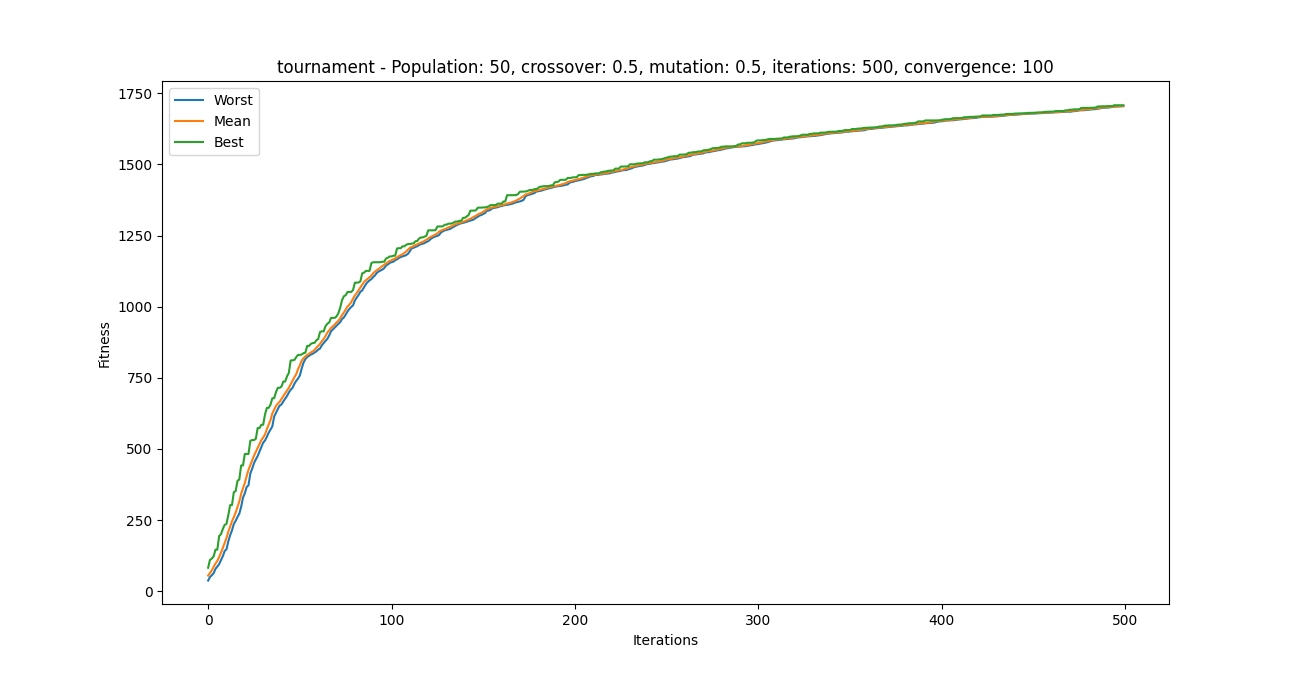

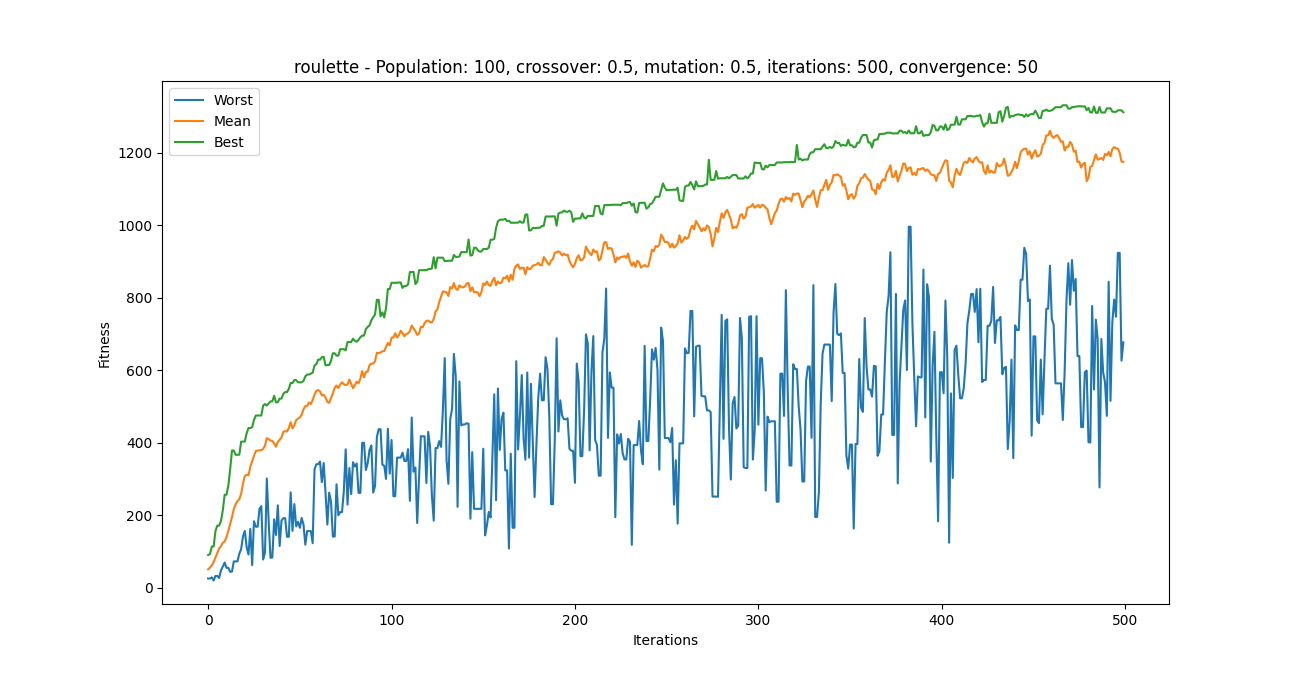

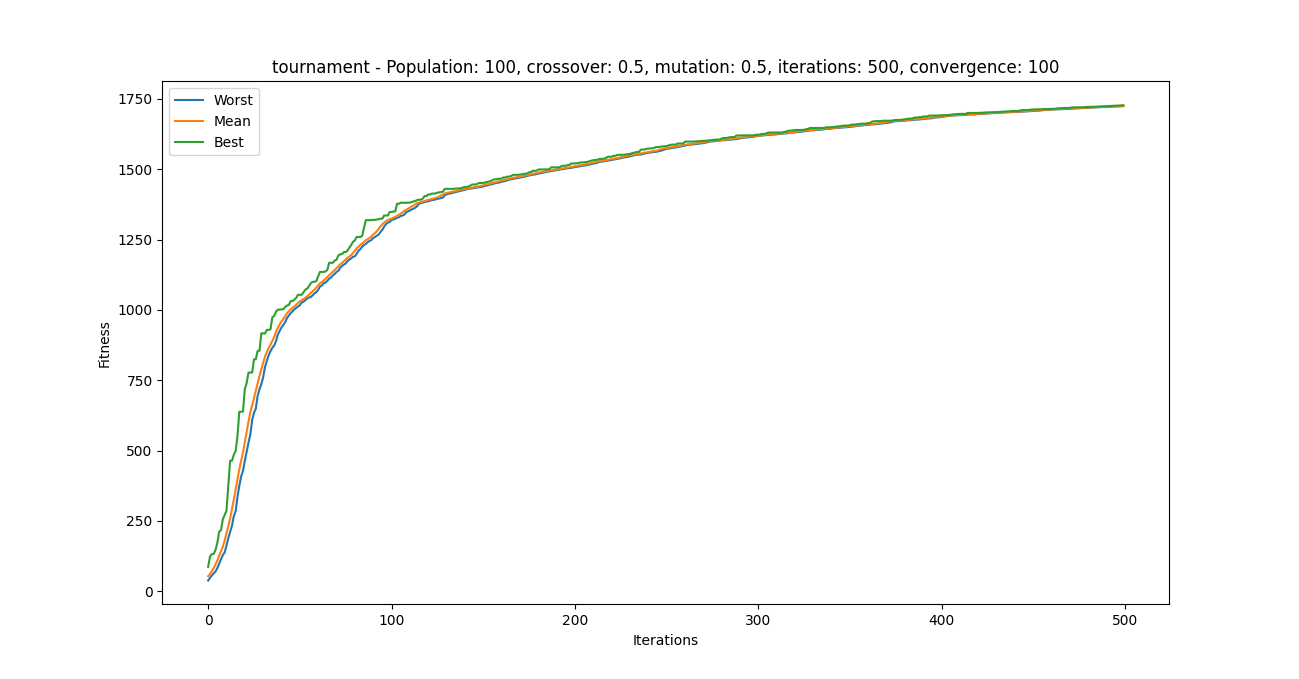

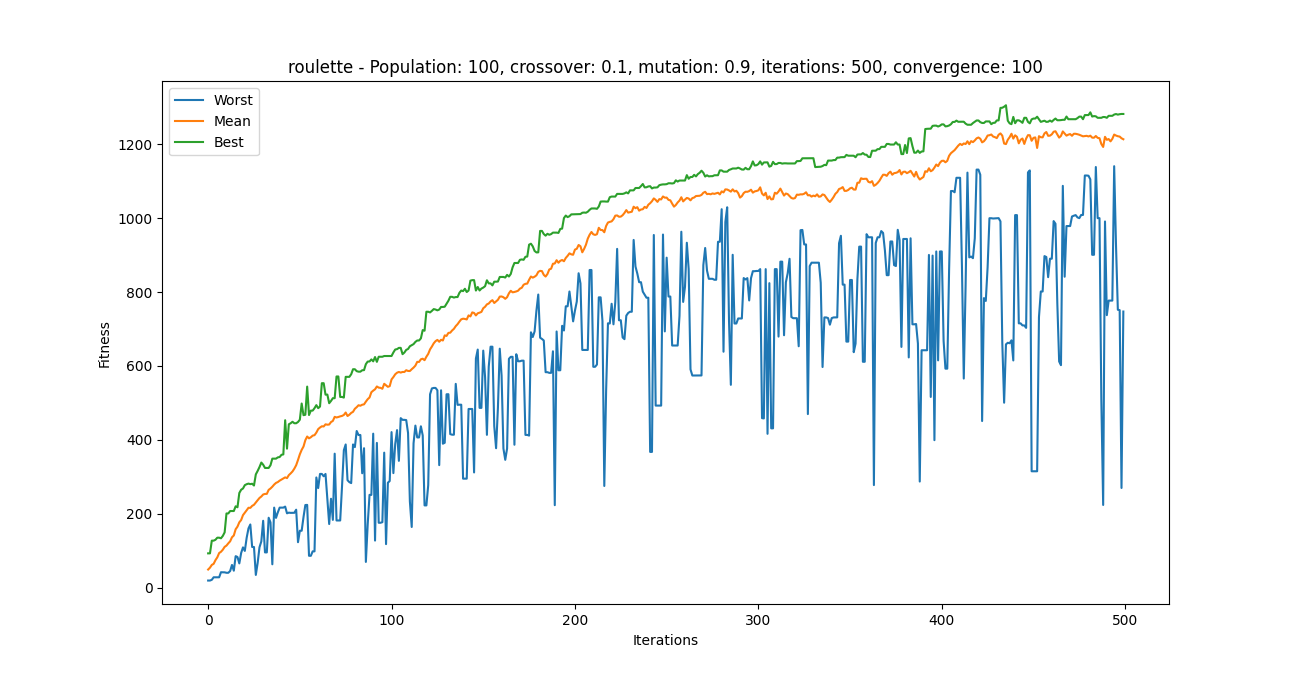

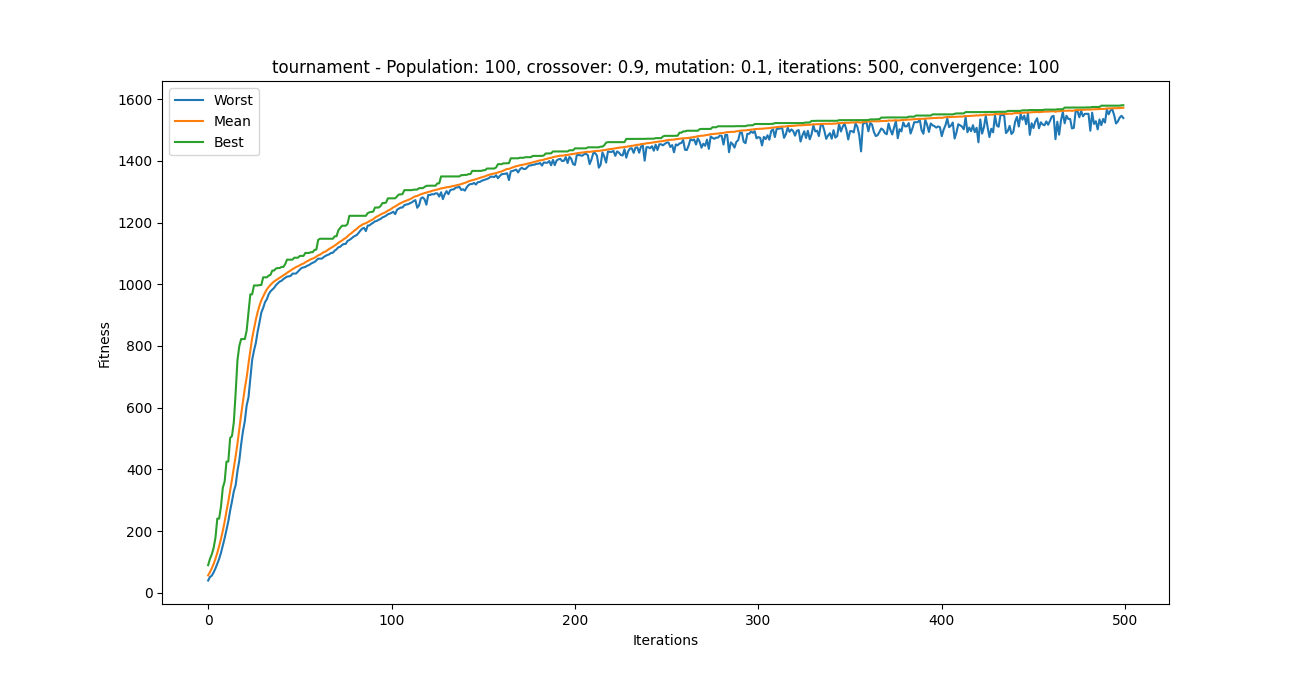

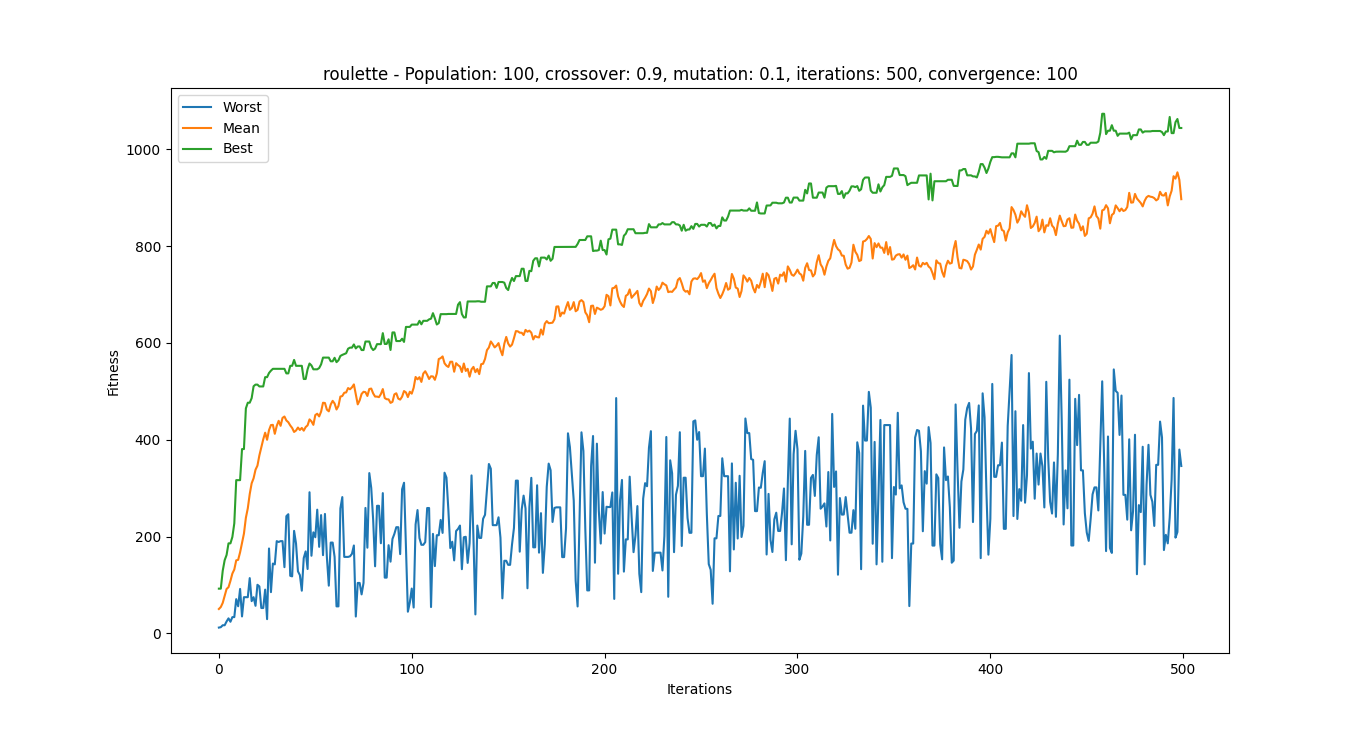

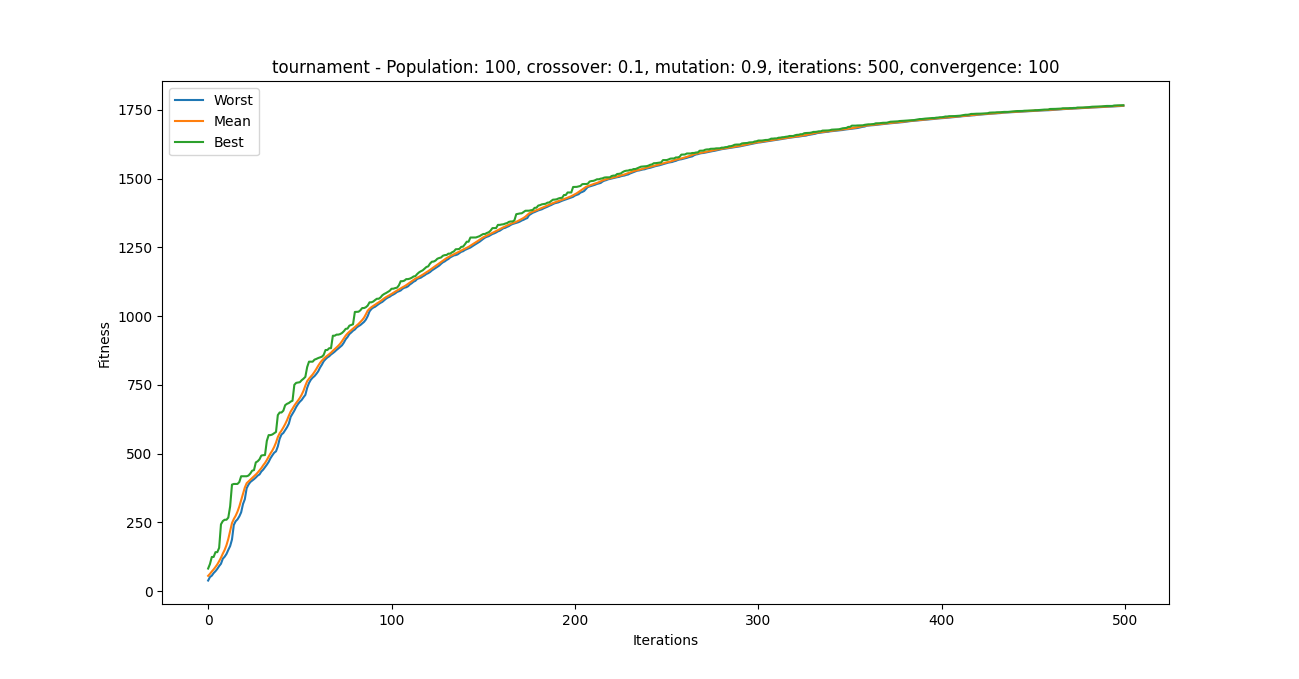

Seja _m_ o tamanho máximo da população, _k_ o número máximo de iterações, _t_ o tamanho do torneio o tempo de execução do algoritmo é da ordem __O__(_m_*_k_*_t_), para a seleção por roleta tome _t = 1_. A memória consumida é da ordem __O__(_m_).

### *Particularidades e restrições*